In [1]:
# Path setup
import sys
import os

%matplotlib inline

sys.path.append(os.path.dirname(os.path.join(os.getcwd(), "../src")))

In [2]:
from src import constants, utils, preprocess, training

In [3]:
MODEL_DIM = constants.MODEL_DIM
GRID_SIZE = constants.GRID_SIZE
NUM_BOX = constants.NUM_BOX
NUM_CLASS = constants.NUM_CLASS

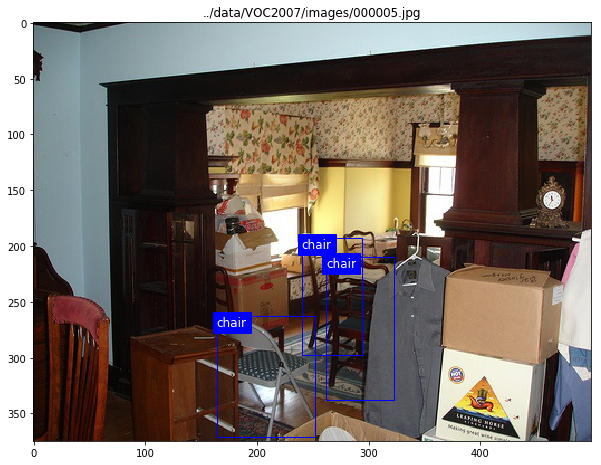

In [4]:
utils.visualize_label("../data/VOC2007/images/000005.jpg", "../data/VOC2007/labels/000005.txt")

In [5]:
ori_image = utils.load_image("../data/VOC2007/images/000005.jpg")
ori_labels = utils.load_labels("../data/VOC2007/labels/000005.txt")

In [6]:
processed_image = preprocess.preprocess_image(ori_image, MODEL_DIM)
bboxs = preprocess.generate_bboxs(ori_labels, ori_image, MODEL_DIM, GRID_SIZE, NUM_BOX, NUM_CLASS)

In [7]:
bboxs.shape

(7, 7, 50)

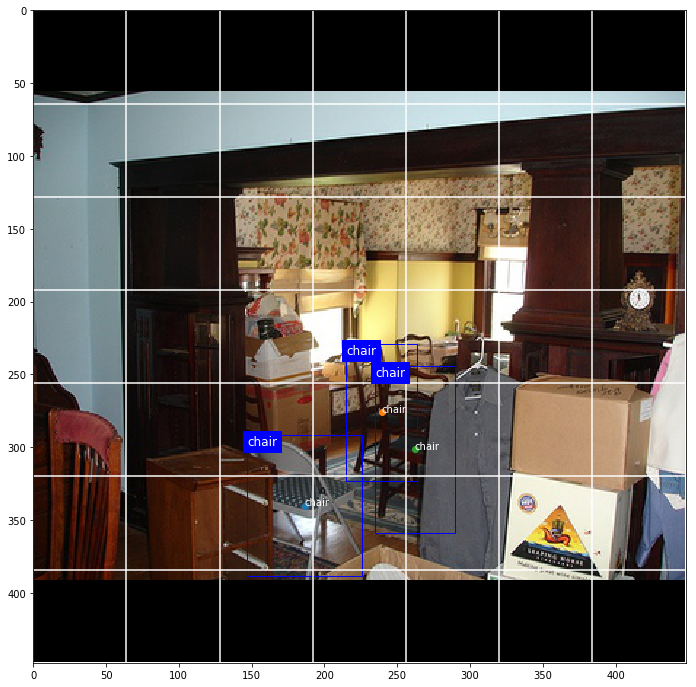

In [8]:
utils.draw_bboxs(processed_image, bboxs, MODEL_DIM)

In [9]:
preprocess.preprocess_data("../data/VOC2007/images",
                           "../data/VOC2007/labels",
                           "../data/VOC2007/pre_images",
                           "../data/VOC2007/pre_labels")

In [10]:
yolo_generator = training.batch_generator("../data/VOC2007/pre_images", "../data/VOC2007/pre_labels")

In [11]:
X, Y = next(yolo_generator)

In [12]:
from PIL import Image

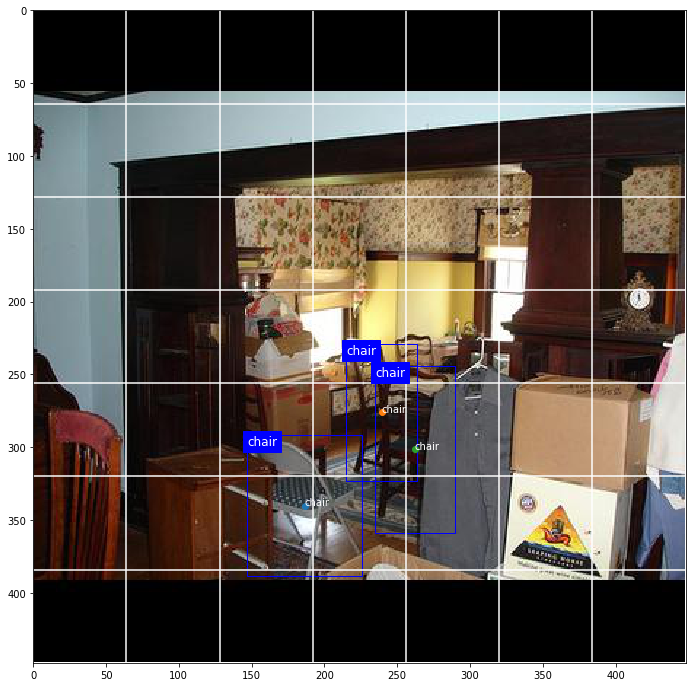

In [13]:
utils.draw_bboxs(Image.fromarray(X[0]), Y[0].reshape((GRID_SIZE, GRID_SIZE, -1)), MODEL_DIM)